In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("data/train.csv", index_col=0)
test = pd.read_csv("data/test.csv", index_col=0)  # does not contain targets

#Gender
train_no_gender = train.copy().drop(columns="Gender")
test_no_gedner = test.copy().drop(columns="Gender")

# Married
train_no_nan_married = train_no_gender.copy().dropna(axis=0, subset=["Married"])
train_no_nan_married = pd.get_dummies(train_no_nan_married, columns=["Married"], drop_first=True)

# Dependents
train_dependent_only_int = train_no_nan_married.copy().replace("3+", 3)
for number in range(0, 3):
    train_dependent_only_int = train_dependent_only_int.replace(f"{number}", number)

train_dependents_no_nan = train_dependent_only_int.copy()


# Education
train_education_dummies = pd.get_dummies(train_dependents_no_nan.copy(), columns=["Education"], drop_first=True)

train_self_employed_encoded = train_education_dummies.copy()

# Self_Employed

train_self_employed_encoded.Self_Employed = train_self_employed_encoded.Self_Employed.replace(["No", "Yes"], [0, 1]) 

# Loan_Amount_Term
si = SimpleImputer(strategy="median")

train_imputed_loan_amount_term = train_self_employed_encoded.copy()
train_imputed_loan_amount_term.Loan_Amount_Term = si.fit_transform(train_imputed_loan_amount_term.Loan_Amount_Term.values.reshape(-1, 1))

# Credit_History



# Property_Area and Loan_Status
train_property_area_n_target = pd.get_dummies(train_imputed_loan_amount_term.copy(), columns=["Property_Area", "Loan_Status"], drop_first=True)

# Loan amount
train_LoanAmount_itterative_imputer = train_property_area_n_target.copy()

X = train_LoanAmount_itterative_imputer.iloc[:, :-1]
y = train_LoanAmount_itterative_imputer.iloc[:, -1]

imp_mean = IterativeImputer(random_state=0)
X = imp_mean.fit_transform(X)

X = pd.DataFrame(X, columns=train_LoanAmount_itterative_imputer.iloc[:, :-1].columns)

## Split and train

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)

In [12]:
from catboost import CatBoostClassifier, Pool, cv, CatBoost

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                           learning_rate=1,
                           depth=2)
# Fit model
model.fit(X_train, y_train)
# Get predicted classes
preds_class = model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_test)
# Get predicted RawFormulaVal
#preds_raw = model.predict(eval_dataset, 
#                          prediction_type='RawFormulaVal')

print(model.get_best_score())

0:	learn: 0.4767046	total: 852us	remaining: 84.4ms
1:	learn: 0.4540561	total: 1.69ms	remaining: 82.8ms
2:	learn: 0.4470776	total: 2.35ms	remaining: 76.1ms
3:	learn: 0.4416462	total: 3.18ms	remaining: 76.4ms
4:	learn: 0.4385189	total: 3.95ms	remaining: 75ms
5:	learn: 0.4283326	total: 4.58ms	remaining: 71.7ms
6:	learn: 0.4167824	total: 5.32ms	remaining: 70.7ms
7:	learn: 0.4093264	total: 5.82ms	remaining: 66.9ms
8:	learn: 0.4061799	total: 6.36ms	remaining: 64.3ms
9:	learn: 0.4054551	total: 6.87ms	remaining: 61.8ms
10:	learn: 0.4040593	total: 7.41ms	remaining: 60ms
11:	learn: 0.4028619	total: 7.99ms	remaining: 58.6ms
12:	learn: 0.4019039	total: 8.65ms	remaining: 57.9ms
13:	learn: 0.4010529	total: 9.31ms	remaining: 57.2ms
14:	learn: 0.4003073	total: 10.1ms	remaining: 57ms
15:	learn: 0.3996614	total: 10.7ms	remaining: 56.1ms
16:	learn: 0.3991419	total: 11.4ms	remaining: 55.5ms
17:	learn: 0.3958607	total: 12ms	remaining: 54.6ms
18:	learn: 0.3950947	total: 12.6ms	remaining: 53.6ms
19:	learn: 0

In [13]:
model = CatBoostClassifier()

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6757285	test: 0.6785820	best: 0.6785820 (0)	total: 10.4ms	remaining: 10.4s
1:	learn: 0.6590569	test: 0.6642985	best: 0.6642985 (1)	total: 14.8ms	remaining: 7.41s
2:	learn: 0.6425922	test: 0.6513769	best: 0.6513769 (2)	total: 16.3ms	remaining: 5.41s
3:	learn: 0.6243274	test: 0.6383397	best: 0.6383397 (3)	total: 17.4ms	remaining: 4.33s
4:	learn: 0.6109307	test: 0.6306864	best: 0.6306864 (4)	total: 18.7ms	remaining: 3.72s
5:	learn: 0.5983313	test: 0.6213980	best: 0.6213980 (5)	total: 20.5ms	remaining: 3.4s
6:	learn: 0.5875222	test: 0.6138305	best: 0.6138305 (6)	total: 22.1ms	remaining: 3.13s
7:	learn: 0.5760028	test: 0.6053770	best: 0.6053770 (7)	total: 23.4ms	remaining: 2.91s
8:	learn: 0.5649713	test: 0.5977231	best: 0.5977231 (8)	total: 25.2ms	remaining: 2.77s
9:	learn: 0.5568256	test: 0.5928082	best: 0.5928082 (9)	total: 26.7ms	remaining: 2.64s
10:	learn: 0.5463040	test: 0.5848793	best: 0.5848793 (10)	total: 28.4ms	remaining: 2.56s
11:	learn: 0.5371625	test: 0.5788701	best:

In [14]:
grid_search_result["params"]

{'depth': 6, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [22]:
from sklearn.metrics import accuracy_score, f1_score
model = CatBoostClassifier(depth=6, l2_leaf_reg=1, learning_rate=0.1, iterations=16)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_true=y_test, y_pred=predictions)}")
print(f"F1 score: {f1_score(y_true=y_test, y_pred=predictions)}")

0:	learn: 0.6556636	total: 1.94ms	remaining: 29.1ms
1:	learn: 0.6238999	total: 3.7ms	remaining: 25.9ms
2:	learn: 0.5980969	total: 5.87ms	remaining: 25.4ms
3:	learn: 0.5777334	total: 8.33ms	remaining: 25ms
4:	learn: 0.5579212	total: 10.4ms	remaining: 22.9ms
5:	learn: 0.5384638	total: 12.5ms	remaining: 20.9ms
6:	learn: 0.5216188	total: 15.5ms	remaining: 20ms
7:	learn: 0.5090663	total: 17.2ms	remaining: 17.2ms
8:	learn: 0.4968167	total: 20.1ms	remaining: 15.7ms
9:	learn: 0.4871045	total: 22.5ms	remaining: 13.5ms
10:	learn: 0.4775970	total: 24.6ms	remaining: 11.2ms
11:	learn: 0.4688972	total: 26.5ms	remaining: 8.82ms
12:	learn: 0.4619148	total: 28.1ms	remaining: 6.5ms
13:	learn: 0.4548757	total: 30.4ms	remaining: 4.34ms
14:	learn: 0.4503076	total: 32.4ms	remaining: 2.16ms
15:	learn: 0.4449185	total: 34.6ms	remaining: 0us
Accuracy score: 0.7717391304347826
F1 score: 0.85


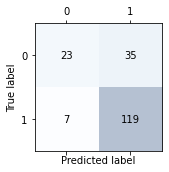

In [23]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=predictions)   # Creating a confusion matrix by compairing true target against predicted target

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

## Anther catboost model

In [33]:
X.tail()

TypeError: int() argument must be a string, a bytes-like object or a number, not 'DataFrame'

In [31]:
cat_features

Index(['Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History',
       'Married_Yes', 'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [36]:
cat_features = [0, 1, 5, 6, 7, 8, 9, 10]



# Initialize CatBoostClassifier
model = CatBoostClassifier(depth=6, l2_leaf_reg=1, learning_rate=0.1, iterations=50)

# Fit model
model.fit(X_train.astype(int), y_train, cat_features)
# Get predicted classes
preds_class = model.predict(X_test.astype(int))
# Get predicted RawFormulaVal
preds_raw = model.predict(X_test.astype(int), prediction_type='RawFormulaVal')

print(f"Accuracy score: {accuracy_score(y_true=y_test, y_pred=predictions)}")
print(f"F1 score: {f1_score(y_true=y_test, y_pred=predictions)}")

0:	learn: 0.6608421	total: 21.4ms	remaining: 1.05s
1:	learn: 0.6353741	total: 42.8ms	remaining: 1.03s
2:	learn: 0.6132976	total: 53.5ms	remaining: 837ms
3:	learn: 0.5942434	total: 63.4ms	remaining: 729ms
4:	learn: 0.5780131	total: 94.6ms	remaining: 851ms
5:	learn: 0.5652171	total: 112ms	remaining: 822ms
6:	learn: 0.5536120	total: 140ms	remaining: 858ms
7:	learn: 0.5430701	total: 166ms	remaining: 873ms
8:	learn: 0.5306013	total: 185ms	remaining: 844ms
9:	learn: 0.5221400	total: 203ms	remaining: 812ms
10:	learn: 0.5135842	total: 222ms	remaining: 785ms
11:	learn: 0.5068524	total: 245ms	remaining: 775ms
12:	learn: 0.5026325	total: 253ms	remaining: 720ms
13:	learn: 0.4991312	total: 259ms	remaining: 665ms
14:	learn: 0.4951368	total: 273ms	remaining: 638ms
15:	learn: 0.4897933	total: 292ms	remaining: 621ms
16:	learn: 0.4849613	total: 316ms	remaining: 613ms
17:	learn: 0.4798897	total: 333ms	remaining: 592ms
18:	learn: 0.4785452	total: 349ms	remaining: 570ms
19:	learn: 0.4761140	total: 366ms	re